<a href="https://colab.research.google.com/github/VivekSalwan2000/RNN-Based-Next-Word-Prediction-Model/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# COSC 3P96 - Assignment 2
**Name:** Vivek Salwan  
**Student ID:** 6951826

## Overview

In this notebook, we are building a language model using an RNN (Recurrent Neural Network) with TensorFlow/Keras. The key steps include:

1. **Data Loading and Preprocessing:**  
   We read in the dataset and preprocess the text (e.g., converting to lowercase, removing punctuation and extra spaces) to prepare it for modeling.

2. **Tokenization and Sequence Creation:**  
   The text is tokenized and transformed into numerical sequences. We then create input-output sequences where the model learns to predict the next word given a sequence of previous words.

3. **Model Building and Training:**  
   An RNN model is defined, trained on the prepared sequences, and evaluated. The model uses embedding and SimpleRNN layers to capture the language structure.

4. **Model Saving and Analysis:**  
   The trained model is saved in the native Keras format, and the training history is stored as JSON for later analysis. We then plot the training loss and accuracy to visualize model performance.

Let's begin with the implementation!


In [ ]:
import numpy as np
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import regex as re
import string
import matplotlib.pyplot as plt


### Data Loading
- **File Path:** Specifies the location of your data file.
- **Function:** `load_data` reads the file with UTF-8 encoding.
- **Usage:** The content is stored in the `raw_text` variable.




In [ ]:
file_path = "/Users/viveksalwan/Desktop/8th_semester/COSC_3P96/Assignment_2/Data.txt"  # file path

# Function to read data from file
def load_data(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

# Load and process the dataset
raw_text = load_data(file_path)

### Text Preprocessing

- **Lowercase:** Converts text to lowercase.
- **Remove Punctuation:** Strips punctuation via regex.
- **Remove Newlines & Extra Spaces:** Replaces newline characters and multiple spaces with a single space.

Processed text is stored in `processed_text`.


In [ ]:
# Preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub("\n", " ", text)  # Remove newlines
    text = re.sub(" +", " ", text)  # Remove extra spaces
    return text

processed_text = preprocess_text(raw_text)



### Tokenization

- **Tokenizer Setup:** Creates a `Tokenizer` with a vocabulary limit of 5,000 words and uses `<PAD>` for out-of-vocabulary tokens.
- **Fitting:** Applies the tokenizer to `processed_text` to build a word index.
- **Outputs:**  
  - `word_index` holds the mapping of words to indices.  
  - `vocab_size` is set to the total number of words plus one.


In [ ]:
# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<PAD>")
tokenizer.fit_on_texts([processed_text])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1


### Create Input-Output Sequences

- **Function:** `create_sequences` splits the text into words and creates sequences using a sliding window.
- **Sliding Window:** For each position in the text (starting at `seq_length`), it selects the previous `seq_length` words plus the current word as the sequence.
- **Output:** The resulting list of sequences is stored in the variable `sequences`.


In [ ]:
# Create input-output sequences
def create_sequences(text, tokenizer, seq_length=4):
    sequences = []
    words = text.split()
    for i in range(seq_length, len(words)):
        seq = words[i-seq_length:i+1]
        sequences.append(seq)
    return sequences

sequences = create_sequences(processed_text, tokenizer)

### Convert Text Sequences to Numerical Sequences

- **Mapping:** Each word in the sequences is replaced with its corresponding index from the tokenizer's `word_index`.
- **Filtering:** Only words found in the `word_index` are converted.
- **Output:** The resulting numerical sequences are stored in `encoded_sequences`.


In [ ]:
# Convert text sequences to numerical sequences
encoded_sequences = []
for seq in sequences:
    encoded_seq = [tokenizer.word_index[word] for word in seq if word in tokenizer.word_index]
    encoded_sequences.append(encoded_seq)

### Convert to NumPy Array & Prepare Input-Output

- **NumPy Conversion:** Converts the list of numerical sequences into a NumPy array.
- **Input-Output Split:** Uses slicing to separate each sequence into input (`X`) and target (`y`), where the last word is the target.
- **One-Hot Encoding:** Converts the target `y` into one-hot vectors using `vocab_size` as the number of classes.


In [ ]:
# Convert to numpy array
encoded_sequences = np.array(encoded_sequences)
X, y = encoded_sequences[:, :-1], encoded_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

### Define the RNN Model

- **Architecture:**
  - **Embedding Layer:** Converts input indices into dense vectors.
  - **RNN Layers:** Two SimpleRNN layers (the first returns sequences).
  - **Dense Layers:** A hidden layer with ReLU activation followed by an output layer with softmax to predict the next word.
- **Compilation:** Uses categorical crossentropy loss and the Adam optimizer.
- **Usage:** The function `build_rnn_model` is called with `vocab_size` and sequence length (`seq_length`) to create the model.

In [ ]:
# Define the RNN model
def build_rnn_model(vocab_size, seq_length):
    model = Sequential([
        Embedding(vocab_size, 50, input_length=seq_length),
        SimpleRNN(100, return_sequences=True),
        SimpleRNN(100),
        Dense(100, activation='relu'),
        Dense(vocab_size, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seq_length = X.shape[1]
model = build_rnn_model(vocab_size, seq_length)
model.build(input_shape=(None, seq_length))
model.summary()

/Users/viveksalwan/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 4, 50)          │       520,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 4, 100)         │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10411)          │     1,051,511 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,617,361 (6.17 MB)

 Trainable params: 1,617,361 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

### Build, Train, and Save the Model

- **Build and Train:**  
  The RNN model is built using `build_rnn_model` with the vocabulary size and sequence length from `X`. It is trained for 100 epochs with a batch size of 64.

- **Save Model:**  
  The trained model is saved in the native Keras format (`.keras`).

- **Save Training History:**  
  The training history (loss, accuracy, etc.) is saved as a JSON file (`train_history.json`) for later analysis and graphing.



In [ ]:
# Build and train the model
seq_length = X.shape[1]
model = build_rnn_model(vocab_size, seq_length)
history = model.fit(X, y, epochs=100, batch_size=64, verbose=1)

# Save the model in native Keras format (note the .keras extension)
model.save("my_rnn_model.keras")

# Save the training history to a JSON file for later graphing
import json
with open("train_history.json", "w") as f:
    json.dump(history.history, f)

Epoch 1/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.0517 - loss: 6.9725
Epoch 2/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.0846 - loss: 6.1460
Epoch 3/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.1064 - loss: 5.7916
Epoch 4/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1248 - loss: 5.5129
Epoch 5/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1407 - loss: 5.3123
Epoch 6/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1520 - loss: 5.1614
Epoch 7/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1651 - loss: 5.0029
Epoch 8/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1765 - loss: 4.8600
Epoch 9/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1907 - loss: 4.7140
Epoch 10/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1953 - loss: 4.6285
Epoch 11/100
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2047 - loss: 4.53


### Load and Plot Training History

- **Load History:** Reads the training metrics from `train_history.json`.
- **Plotting:**  
  - Plots training loss (in red) and training accuracy (in blue) on the same graph.
  - Labels the axes (`Epoch` on x-axis and `Value` on y-axis) and adds a title.
  - Includes a legend and grid for clarity.


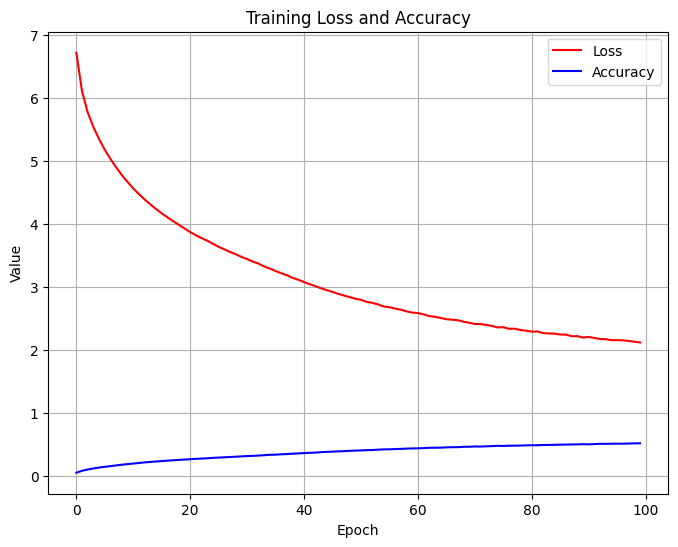

In [ ]:
# Load training history
with open("train_history.json", "r") as f:
    history = json.load(f)

# Plot both loss and accuracy on the same graph
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], color='red', label='Loss')
plt.plot(history['accuracy'], color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Predict the Next Word

- **Preprocessing:** Converts input text to lowercase, removes punctuation, and splits into words.
- **Padding:** If the input is shorter than `seq_length`, prepends `<PAD>` tokens.
- **Encoding:** Maps words to their indices and pads the sequence.
- **Prediction:** Uses the trained model to predict the next word's index, then retrieves the corresponding token from the tokenizer.


In [ ]:
# Predict the next word
def predict_next_word(model, tokenizer, text, seq_length):
    text = preprocess_text(text)
    words = text.split()

    # Pad with start tokens if input is too short
    while len(words) < seq_length:
        words.insert(0, "<PAD>")

    seq = words[-seq_length:]
    encoded_seq = [tokenizer.word_index.get(word, 0) for word in seq]
    encoded_seq = pad_sequences([encoded_seq], maxlen=seq_length, padding='pre')

    predicted_index = np.argmax(model.predict(encoded_seq), axis=-1)[0]
    predicted_word = {index: word for word, index in tokenizer.word_index.items()}.get(predicted_index, "[Unknown]")

    return predicted_word


### User Input for Testing

- **Input Prompt:** Asks the user to enter a phrase.
- **Prediction:** Uses `predict_next_word` to determine the next word based on the input.
- **Output:** Displays both the user's phrase and the predicted word.


In [ ]:
# User input for testing
user_input = input("Enter a phrase: ")
predicted_word = predict_next_word(model, tokenizer, user_input, seq_length)
print(f"User Input: {user_input}\nPredicted Next Word: {predicted_word}")

Enter a phrase: I am very 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
User Input: I am very 
Predicted Next Word: stupid



### End Summary

In this assignment, we built an RNN language model to predict the next word in a sequence. We observed that:

- **Data Preprocessing & Tokenization:** Proper cleaning and tokenization are essential for good performance.
- **Model Training:** The RNN successfully learned language patterns, as reflected by the improvements in loss and accuracy over epochs.
- **Prediction Capability:** Although the predictions aren’t perfect, the model demonstrates a solid understanding of sequential word patterns.

Overall, this project highlights the importance of data preparation, effective model design, and training strategies in natural language processing.

Some Outputs:

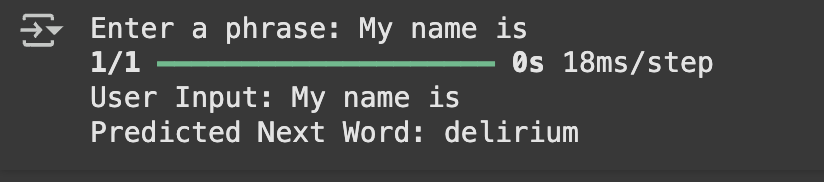






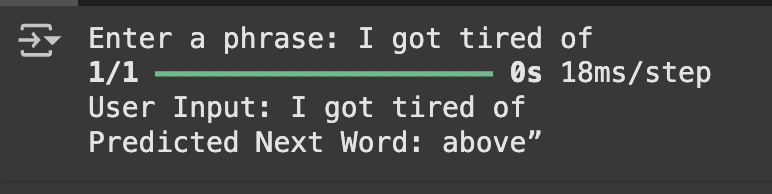

